<a href="https://colab.research.google.com/github/JesseLynch37/Math152/blob/main/Exploration1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration 1 - Group 2
## Collatz Conjecture
Tanner Boyea, Laura Daniels, Jesse Lynch, Gavin Moss, Alexei Pelyushenko

##About this exploration:
In this exploration, we will consider a positive integer *n*. We will then apply an algorithm, in order to achieve a repeating sequence of 4 → 2 → 1 → 4.... This is known as The Collatz Conjecture. The Collatz Conjecture has yet to be proven, nor disproven.

The different sections of this exploration include:

* The algorithm
*   A verification that all positive integers up to 1,000,000 follow the conjecture
*   Counting the number of steps to termination
*   What happens when the conjecture is applied to negative integers 





##The Collatz Conjucture algorithm
Start with a positive integer. 

If the integer is odd, we will multiply it by 3, then added by 1. If the integer is even, we will divide it by 2. 

The Collatz Conjecture claims that if we repeat this process, any positive integer will result in a loop of 4 (which we divide by 2 since it's even) → 2 (we once again divide by 2) → 1 (which is odd, so we multiply by 3, then add 1) → 4 → 2 → 1 → 4 → 2 → 1...

##Verifying Collatz Conjecture up to 1,000,000:
In this section we will explore different programming methods in order to verify the Collatz Conjecture holds for every positive integer up to 1 million. We will progressively add strategies so that python can run these tests as efficiently as possible.

In [ ]:
#  Importing time to be used to test efficieny of code
from time import time


We know that the numbers 1, 2, and 4 form an infinite cycle.

Therefore, if n is ever 1, 2, or 4, we can stop the loop.

In [ ]:
#  Confirming that first 1,000,000 integers terminate:
time0 = time()

for N in range(1, 1000001):
    n = N
    while n not in [1, 2, 4]:
        if n%2 == 0:
            n //= 2
        else:
            n = 3 * n + 1

print("First 1,000,000 integers successfully terminated in {} seconds.".format(time() - time0))

#Improvement #1
 If we know all integers smaller than k terminate, we can stop the loop if n ever becomes smaller than k.

If n is even and we know all k < n terminate, we can conclude n terminates without testing it.

More efficient way of testing first 1,000,000 integers:

In [ ]:
#  More efficient way of testing first 1,000,000 integers:
time0 = time()

for N in range(3, 1000001, 2):
    n = N
    while n >= N:
        if n%2 == 0:
            n //= 2
        else:
            n = 3 * n + 1
print("First 1,000,000 integers successfully terminated in {} seconds.".format(time() - time0))

#Improvement #2
We can define a function that replaces a chunk of this code to make future coding easier.

In [4]:
def collatz(n):
  return [n//2, 3*n+1][n%2]

In [ ]:
#  More efficient test now using function:
time0 = time()
for N in range(3, 1000001, 2):
    n = N
    while n >= N:
        n = collatz(n)
print("First 1,000,000 integers successfully terminated in {} seconds.".format(time() - time0))

First 1,000,000 integers successfully terminated in 1.7755839824676514 seconds.


This way isn't quite as fast, but still pretty good and much easier to work with.

## Number of steps to terminate
For the sake of both curiousity and analysis, we can count the number of times we must cycle through through the algorithm in order to reach our loop of 4 → 2 → 1.

#Discoveries
Afer adding a steps counter, we will now test our code on the integers from 1 to 100 by applying both the counter and the collatz function we defined earlier.

In [ ]:
#  Number of steps for n to reach 1, 2, or 4 for all positive n up to 100:
for N in range(1, 101):
  n = N
  steps = 0
  while n not in [1, 2, 4]:
    steps += 1
    n = collatz(n)
  print(N, steps)

Of course, the numbers 1, 2, and 4 take 0 steps.

Past that, we have discovered that:

* Powers of 2 take k steps, where k satisfies $2^k = \frac{n}{4}.$

* The integer that takes the most steps from from 1-100 is 97, taking a total 116 steps to terminate.

In [ ]:
#  Finding greatest number of steps for n to reach 1, 2, or 4 for all positive n up to 1,000,000:
max_steps = 0
for N in range(1, 1000001):
  n = N
  steps = 0
  while n not in [1, 2, 4]:
    steps += 1
    n = collatz(n)
  if steps > max_steps:
    print(N, steps)
    max_steps = steps

After programming a cell to count the steps of each integer from 1-1,000,000, we discover that:

* The number that takes the most steps for all n up to 1,000,000 is $837799$, with a total of $522$ steps.

In [ ]:
#  Number of steps for n to become smaller than it was initially for all positive n up to 100:
#  Skipping even numbers because number of steps will always be 1.
for N in range(3, 101, 2):
  n = N
  steps = 0
  while n >= N:
    steps += 1
    n = collatz(n)
  print(N, steps)

#Additional Discoveries
Some other patterns we recognize is that:

* Every number thats 1 more than a multiple for 4 takes 3 steps.

* 11 takes 8 steps to get smaller. 12 more than that also takes 8 steps. 20 more than that also takes 8 steps. 12 more than that also takes 8 steps. This +12, +20 pattern seems to continue indefinitely.



In [14]:
#  Finding greatest number of steps for n to reach get smaller for all positive n up to 1,000,000:
max_steps = 0
for N in range(3, 1000001, 2):
  n = N
  steps = 0
  while n >= N:
    steps += 1
    n = collatz(n)
  if steps > max_steps:
    print(N, steps)
    max_steps = steps

3 6
7 11
27 96
703 132
10087 171
35655 220
270271 267
362343 269
381727 282
626331 287


The number that takes the most steps for all n up to 1,000,000 is $626331$, with $287$ steps.

In [1]:
import matplotlib.pyplot as plt

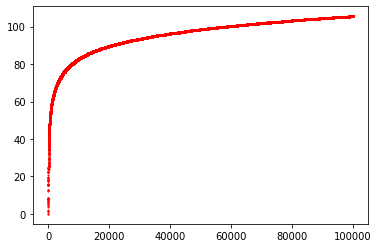

In [20]:
#  Average steps to reach 1, 2, 4 loop graphed:
x_values, y_values = [], []
average = 0
for N in range(1, 100001):
    x_values.append(N)
    steps = 0
    n = N
    while n not in [1, 2, 4]:
        n = collatz(n)
        steps += 1
    average = ((N - 1) * average + steps) / N
    y_values.append(average)

plt.scatter(x_values, y_values, s=1, c='red')
plt.show()

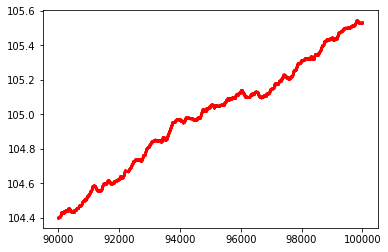

In [22]:
#  A zoom into the right side of the previous graph:
x_values, y_values = [], []
average = 0
for N in range(1, 100001):
    x_values.append(N)
    steps = 0
    n = N
    while n not in [1, 2, 4]:
        n = collatz(n)
        steps += 1
    average = ((N - 1) * average + steps) / N
    y_values.append(average)

plt.scatter(x_values[-10000:], y_values[-10000:], s=1, c='red')
plt.show()

This shows a slow but definite increase.

We can conjecture that the average tends to infinity.

5.209110000000036


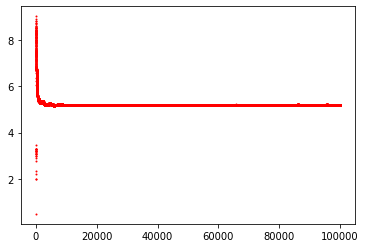

In [17]:
#  Average steps to get smaller graphed:
x_values, y_values = [], []
average = 0
for N in range(2, 100001):
    x_values.append(N)
    steps = 0
    n = N
    while n >= N:
        n = collatz(n)
        steps += 1
    average = ((N - 1) * average + steps) / N
    y_values.append(average)

print(average)
plt.scatter(x_values, y_values, s=1, c='red')
plt.show()

5.209110000000036


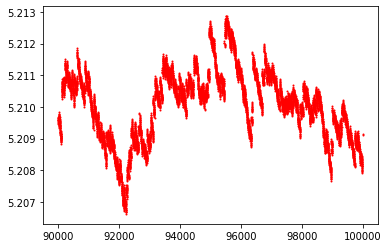

In [25]:
#  A zoom into the right side of the previous graph:
x_values, y_values = [], []
average = 0
for N in range(2, 100001):
    x_values.append(N)
    steps = 0
    n = N
    while n >= N:
        n = collatz(n)
        steps += 1
    average = ((N - 1) * average + steps) / N
    y_values.append(average)

print(average)
plt.scatter(x_values[-10000:], y_values[-10000:], s=1, c='red')
plt.show()

This shows the average number of steps obriting around a fixed value of roughly 5.2.

Let us explore this value more.

In [36]:
#  Finding a more precise average
average = 0
for N in range(2, 10000001):
    if N%1000000 == 0:
        print("Calculating... {:.0%} complete".format(N / 10000000))
    steps = 0
    n = N
    while n >= N:
        n = collatz(n)
        steps += 1
    average = ((N - 1) * average + steps) / N

print(average)

Calculating... 10% complete
Calculating... 20% complete
Calculating... 30% complete
Calculating... 40% complete
Calculating... 50% complete
Calculating... 60% complete
Calculating... 70% complete
Calculating... 80% complete
Calculating... 90% complete
Calculating... 100% complete
5.235935099999933


From this, we can see that the average still appears to hover around a fixed value.

The average number of steps to get smaller after the first 10,000,000 is 5.236

## Negative integers
We've seen how the collatz conjecture works for positive integers, but what might we find if we try applying it to negative integers?

Let's start with $-1$

In [ ]:
n = -1
for i in range(10):
  print(n)
  n = collatz(n)

Starting at $-1$ leads to a cycle of -1 → -2 → -1....

This means $-2$ will also have this result.

In [ ]:
#  Testing -3:
n = -3
for i in range(10):
  print(n)
  n = collatz(n)

Starting at $-3$ also leads to a -1, -2 cycle.


#Conjecture A
Initally, it seems that all negative integers will lead to a -1 → -2 
→ -1 cycle. For now, lets call this Conjecture A, but let's keep exploring.

In [ ]:
#  Testing Conjecture A for first 100 negative integers:
for N in range(-1, -101, -1):
  n = N
  while n not in [-1, -2]:
    print(N, n)
    n = collatz(n)
print("First 100 negative integers successfully terminated")

Conjecture A failed at n = -5, which lead to a -5 → -14 → -7 → -20 → -10 → -5... cycle.

#Conjecture B
Naturally, our next conjecture is that:
all negative integers will lead to a -1, -2 cycle or a -14 → -7 → -20 → -10 → -5 cycle. Let's call this Conjecture B.

In [ ]:
#  Testing Conjecture B for first 100 negative integers:
for N in range(-1, -101, -1):
  n = N
  while n not in [-1, -2, -5, -14, -7, -20, -10]:
    print(N, n)
    n = collatz(n)
print("First 100 negative integers successfully terminated")

Conjecture B failed at -17, which resulted in a shocking long cycle of length 18. This cyle being:

-74 → -37 → -110 → -55 → -164 → -82 → -41 → -122 → -61 → -182 → -91 → -272 → -136 → -68 → -34 → -17 → -50 → -25

#Conjecture C
Conjecture C: all negative integers will lead to a repeating cycle.


In [ ]:
#  Testing Conjecture C for first 100 negative integers:
for N in range(-1, -10001, -1):
  n = N
  current_chain = []
  while n not in current_chain:
    current_chain.append(n)
    n = collatz(n)
print("First 10,000 negative integers successfully terminated")

In [ ]:
#  More testing on the terminal properties of large negative numbers:
for N in range(-10000000001, -10000000101, -1):
  n = N
  current_chain = []
  while n not in current_chain:
    current_chain.append(n)
    n = collatz(n)
  loop_len = len(current_chain) - current_chain.index(n)
  print(N, loop_len, current_chain[-loop_len:])

#Negative Integers Conclusion and Conjecture D
After testing all negative numbers up to -10,000,000,000 for their final cycle length and final cycle, it was found that all negative numbers end up in one of the following cycles:


1.   [-2, -1]
2.   [-14, -7, -20, -10, -5]
3.   [-74, -37, -110, -55, -164, -82, -41, -122, -61, -182, -91, -272, -136, -68, -34, -17, -50, -25]

Conjecture D: All negative numbers will end up in one of the above cycles.

##A Change of "Rules"
We've made some interesting discoveries in regards to both the standard Collatz Conjecture, and applying such to negative integers.

Let's see what happens if we change our algorithm to something other than 3n + 1 if odd, and n/2 when even.

#$3n -1$
First, let's see what happens if n is odd, we once again multiply by 3, but this time we'll subtract 1 rather than add 1.

In [ ]:
def modified_collatz1(n):
  return [n//2, 3*n-1][n%2]

Let's see how this works for the first 100 positive integers.

In [ ]:
for N in range(1, 101):
  n = N
  while n not in [1, 2, 4]:
    print(N, n)
    n = modified_collatz1(n)
print("First 100 negative integers successfully terminated")

Once n = 5, we get stuck in a loop of 5 → 14 → 7 → 20 → 10, → 5...

This is very similar to when we first attempted to apply the original Collatz Conjecture to negative integers. 

That makes sense, adding 1 to a negative number, results in the same difference as subtracting 1 from a positive number.

#$3n + 2$
What if we multiply by 3 and add 2 if n is odd?

In [ ]:
def modified_collatz2(n):
  return [n//2, 3*n+2][n%2]

In [ ]:
#WARNING VERY LARGE NUMBERS
for N in range(1, 4):
  n = N
  while n not in [1, 2, 4]:
    print(N, n)
    n = modified_collatz2(n)

3 3
3 11
3 35
3 107
3 323
3 971
3 2915
3 8747
3 26243
3 78731
3 236195
3 708587
3 2125763
3 6377291
3 19131875
3 57395627
3 172186883
3 516560651
3 1549681955
3 4649045867
3 13947137603
3 41841412811
3 125524238435
3 376572715307
3 1129718145923
3 3389154437771
3 10167463313315
3 30502389939947
3 91507169819843
3 274521509459531
3 823564528378595
3 2470693585135787
3 7412080755407363
3 22236242266222091
3 66708726798666275
3 200126180395998827
3 600378541187996483
3 1801135623563989451
3 5403406870691968355
3 16210220612075905067
3 48630661836227715203
3 145891985508683145611
3 437675956526049436835
3 1313027869578148310507
3 3939083608734444931523
3 11817250826203334794571
3 35451752478610004383715
3 106355257435830013151147
3 319065772307490039453443
3 957197316922470118360331
3 2871591950767410355080995
3 8614775852302231065242987
3 25844327556906693195728963
3 77532982670720079587186891
3 232598948012160238761560675
3 697796844036480716284682027
3 2093390532109442148854046083
3 628

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



3 87898615741460742755967505212885398982284701910692697608147425447931651782605914976421626330429350354727308281588034666506602168563347838957785799247335128658234082572310519384530392925489291864107057931891547618233833139456074863432509918868333061523584146128477374682456429528447391730074061998136156749809474825218603244479527885368574013324125524018980101683303295094095248579709404660802350385663928827616899609982933493752584956344939675112089559323590952036645162041398493658038397011454505046474503266492977943842634788328274582247367702727621506216099763959182708851446294574552152151191321804787497397366080135904915578908122816403387405346033220767539463707044525397790068061549976316092445464910841469470351259455212971793049543226181040337297869904680884190217225078005512328940277076132766487872817189464010064937262352065939352413446274891533789591857379752324670691619601268227539389937141823068689717568801660600210700915337584791447243507886718148688870757309867280683877777085447

KeyboardInterrupt: ignored

At only n = 3, this version of the conjecture launches our intger up towards infinity.

Thinking through it, we realize:
3 → 11 → 35 → 107 → 323 → 971 → 2915 → 8747 → 26243 →...

The last digits of each number seem to be in a cycle of 3 → 1 → 5 → 7 → 3...

Because of this, n will always be odd. Since n increases (3n + 2) when odd, and decreases when even (n//2), conjectures will always appraoch infinity unless n is able to be even.